### 数据集

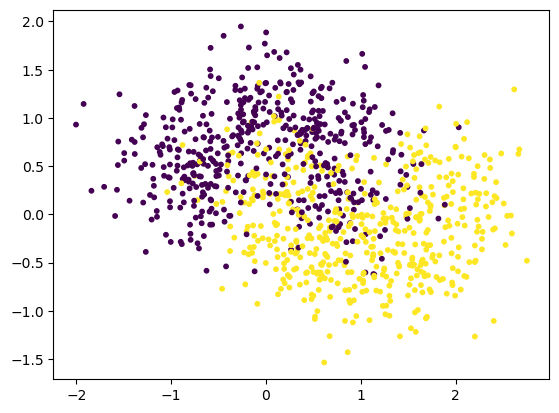

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# 生产2类圆月分布数据,1000个样本点,噪声为0.4
x, y = make_moons(n_samples=1000, noise=0.4, random_state=20)
plt.scatter(x[:, 0], x[:, 1], c = y, s = 10)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

### Bagging

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # 基学习器,这里使用决策树
    n_estimators=100,                    # 基学习器数量(其实就是集成学习的个数)
    bootstrap=True,                      # 是否有放回采样
    max_samples=500,                     # 每次抽样的样本数,也就是每次取500个样本训练
    n_jobs=-1,                           # 并行数，-1表示使用所有CPU
    random_state=20                      # 随机种子
)
bagging.fit(x_train, y_train)
bagging.score(x_test, y_test)

0.848

### OOB

In [26]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # 基学习器,这里使用决策树
    n_estimators=100,                    # 基学习器数量(其实就是集成学习的个数)
    bootstrap=True,                      # 是否有放回采样（True表示有放回采样）
    max_samples=500,                     # 每次抽样的样本数,也就是每次取500个样本训练
    oob_score=True,                      # 是否使用袋外样本来评估模型(当true时,需要设置bootstrap=True,且不需要划分测试集和训练集)    
    n_jobs=-1,                           # 并行数，-1表示使用所有CPU
    random_state=20                      # 随机种子
)
bagging.fit(x, y)
bagging.oob_score_

0.84

In [27]:
# 当特征比较多时, 我们也可以对特征进行有放回采样,这样规避一些不重要特征对结果的影响
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # 基学习器，这里使用决策树
    n_estimators=100,                    # 基学习器数量（集成的决策树个数）
    bootstrap=True,                      # 是否有放回采样（True表示有放回采样）
    max_samples=500,                     # 每个基学习器抽取的样本数
    oob_score=True,                      # 是否使用袋外样本评估模型(当true时,需要设置bootstrap=True,且不需要划分测试集和训练集)    
    bootstrap_features=True,             # 是否对特征进行有放回采样（True表示对特征也采样）
    max_features=1,                      # 每个基学习器抽取的特征数
    n_jobs=-1,                           # 并行数，-1表示使用所有CPU
    random_state=20                      # 随机种子，保证结果可复现
)
bagging.fit(x, y)
bagging.oob_score_

0.78